# Homework #2

## Problem 1) Brain Teaser

The probability of rolling snake eyes is 1/36 (1:1) while the probability of rolling sums to 7 is 6/36 = 1/6 (1:6, 2:5, 3:4, 4:3, 5:2, 6:1) so the probability of rolling 7 is greater.

## Problem 2) Convolution Operator

Pa+b(x) = Sum(z)Pa(z)Pb(x-z)

### Math and counting
### Sum to 0
#### x x x x x x x 1 2 3 4 5 6
#### 6 5 4 3 2 1
0 combinations
Pa+b = 0/36 = 0
b = 8 a = -1

### Sum to 1
#### x x x x x x 1 2 3 4 5 6
#### 6 5 4 3 2 1
0 combinations
Pa+b = 0/36 = 0
b = 7, a = 0

### Sum to 2
#### x x x x x 1 2 3 4 5 6
#### 6 5 4 3 2 1
1 combination
Pa+b = 1/36
b = 6, a = 1

### Sum to 3
#### x x x x 1 2 3 4 5 6
#### 6 5 4 3 2 1
2 combinations
Pa+b = 2/36 = 1/18
b = 5, a = 2

### Sum to 4
#### x x x 1 2 3 4 5 6
#### 6 5 4 3 2 1
3 combinations
Pa+b = 3/36 = 1/12
b = 4, a = 3

And so on...

### Numerically

In [87]:
import numpy as np
prob = np.convolve([0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6], [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
print(prob)

[0.         0.         0.02777778 0.05555556 0.08333333 0.11111111
 0.13888889 0.16666667 0.13888889 0.11111111 0.08333333 0.05555556
 0.02777778]


In the numerical way of solving this convolution I made all of the dice values probabilities of 1/6 (their respective probabilties for each dice roll and I added a 0 in the beginning for the offset values.

# Problem 3) Mean and Variance

Mean:  7.0
Variance:  5.833333333333334
STD:  2.41522945769824


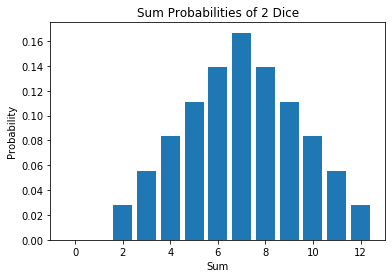

In [88]:
weight = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
mean = np.dot(weight, np.transpose(prob))
print('Mean: ', mean)
variance = np.dot((weight - mean)**2, np.transpose(prob))
print('Variance: ', variance)
print('STD: ', np.sqrt(variance))
plt.bar(weight, prob)
plt.xlabel('Sum')
plt.ylabel('Probability')
plt.title('Sum Probabilities of 2 Dice')
plt.show()

# Problem 4) Graph

Mean:  35.0
Variance:  29.166666666666654
STD:  5.400617248673216


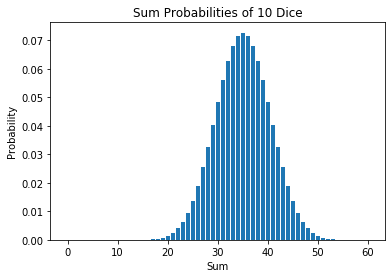

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
init = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
result = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
poss = list(range(0, 61))
for x in range(9):
    result = np.convolve(result, init)
meanOfTen = np.dot(poss, np.transpose(result))
print('Mean: ', meanOfTen)
varianceOfTen = np.dot((poss - meanOfTen)**2, np.transpose(result))
print('Variance: ', varianceOfTen)
print('STD: ', np.sqrt(varianceOfTen))
plt.bar(poss, result)
plt.xlabel('Sum')
plt.ylabel('Probability')
plt.title('Sum Probabilities of 10 Dice')
plt.show()

This is a Gaussian distribution most notably for its distinct bell shape where its average sum is also its most common sum (mode) as well as the middle most sum (median). Additionally, approximately 68% of the sum of ten rolls of the dice are within 1 standard deviation (5.4) of the mean which is expected of a Gaussian Distribution. Additionally, according to the Central Limit Theorem, most distributions converge to a Gaussian Distribution when average over enough trials. This is both expected and evident as we increase the number of dice from 2 to 10.

# Problem 5) Sum and Average

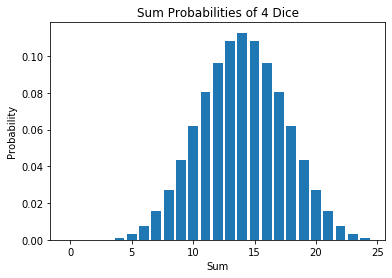

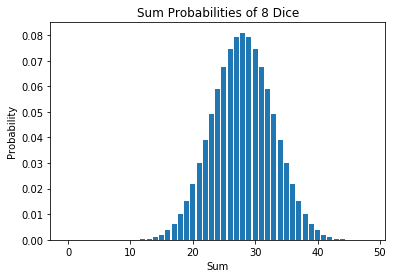

In [90]:
init5 = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
result5 = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
poss5 = list(range(0, 25))
for x in range(3):
    result5 = np.convolve(result5, init5)
plt.bar(poss5, result5)
plt.xlabel('Sum')
plt.ylabel('Probability')
plt.title('Sum Probabilities of 4 Dice')
plt.show()
plt.show()
init5 = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
result5 = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
poss5 = list(range(0, 49))
for x in range(7):
    result5 = np.convolve(result5, init5)
plt.bar(poss5, result5)
plt.xlabel('Sum')
plt.ylabel('Probability')
plt.title('Sum Probabilities of 8 Dice')
plt.show()

The distribution of the sum probabilities of two dice is originally a Guassian Distribution and is convolved with 2 more dice, then 6 more dice, then 8 more dice in order to illustrate the effect of the sum and average of a Gaussian. As you can see, every time the distribution is convolved with the distribution of more dice the distribution becomes more and more Gaussian thus illustrating the idea that the sum and average of an initially Gaussian distribution is also Guassian. As the Guassian changes as a result of summing and averaging the standard deviation increases. You can see that at 2 dice the standard deviation is 2.4 but at 10 dice the standard deviation is 5.4. This is important because as we integrate a signal over time, a given distance that we take the integral of no longer gives the same sigma value after the sum and average of a distribution. Thus we have to take integral of a longer path in order to find sigma.